#### 뉴스 기사 크롤링
=> 구글에 newspapaer github 검색

In [13]:
from bs4 import BeautifulSoup as bs
import requests
import json

In [65]:
resp = requests.get("https://www.yanolja.com/search/%EC%A0%9C%EC%A3%BC%EB%8F%84?placeListType=search&keyword=%EC%A0%9C%EC%A3%BC%EB%8F%84")     ## 위의 코드와 같은 코드
resp

<Response [200]>

In [66]:
url = "https://www.yanolja.com/search/%EC%A0%9C%EC%A3%BC%EB%8F%84"
params = {
    'placeListType' : 'search',
    'keyword' : '제주도',
}

resp = requests.get(url, params = params)
resp

<Response [200]>

In [67]:
# '제주도' 인코딩 문제를 먼저 해결해야한다!!

import urllib
urllib.parse.quote('https://www.yanolja.com/search/제주도?placeListType=search&keyword=제주도')

'https%3A//www.yanolja.com/search/%EC%A0%9C%EC%A3%BC%EB%8F%84%3FplaceListType%3Dsearch%26keyword%3D%EC%A0%9C%EC%A3%BC%EB%8F%84'

In [37]:
base_url = "https://www.yanolja.com/api/v1/contents/search"
params = {
    'capacityAdult': 1,
    'capacityChild': 0,
    'page': 1,
    'limit': 20,
    'keyword': '제주도',
    'checkinDate': '2020-08-16',
    'checkoutDate': '2020-08-17',
    'searchKeyword': '제주도',
    'advert': 'KEYWORD',
    'searchType': 'all',
    'all': 1,
    'sort': 100,
    'themes': None,
    'lat': '37.50681',
    'lng': '127.06624',
    'capacityChildAges': None  
}

headers = {
    'Referer' : 'https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}'.format(urllib.parse.quote('제주도')),
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
#     'Cookie': 'ACEUCI=1; %2Fsearch%2F%EC%A0%9C%EC%A3%BC%EB%8F%84%2Fkeyword-all={%22keyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22searchKeyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22checkinDate%22:%222020-08-16%22%2C%22checkoutDate%22:%222020-08-17%22%2C%22capacityAdult%22:1%2C%22capacityChild%22:0%2C%22capacityChildAges%22:%22%22}; cgntId=ap-northeast-2%3A2b47caae-3694-44f0-9d2b-43c98b30c098; yanolja_sid=s%3A0K-pijLPMujuW6NI5cJVcGOYBO2FXY0h.ZwiC623ThkJsrpFM9m7MiLj%2F8qYFHr3272Xla0K8NCk; SavedFiltersKey=/search/%EC%A0%9C%EC%A3%BC%EB%8F%84/keyword-all; ACEUACS=1596521299174217533; ACEFCID=UID-5F28FB542D0B4D05779333B5; _fbp=fb.1.1596521300441.1991528559; _ga=GA1.2.1408952294.1596521300; _gid=GA1.2.788840749.1596521300; location={%22latitude%22:%2237.50681%22%2C%22longitude%22:%22127.06624%22%2C%22address%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%2042%22%2C%22addressShort%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22%2C%22addressOnlyRoad%22:%22%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22}; wcs_bt=ae93a192ec48a4:1596521393; AWSALB=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx; AWSALBCORS=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx'
}

## 호텔리스트가 홈페이지랑 다르게 나옴 -> 쿠키가 계속 갱신되는 것을 방지하기 위해 -> 처음 홈페이지에 들어가자마자의 쿠키를 저장해놓는다.
s = requests.Session()
s.get("https://www.yanolja.com/search/제주도?placeListType=search&keyword=제주도")
resp = s.get(base_url, params=params, headers=headers)
# resp = requests.get(base_url, params = params, headers=headers)
resp

<Response [200]>

In [38]:
item_li = json.loads(resp.text)
item_li

{'paging': {'isLast': False, 'current': 1, 'total': 97},
 'adverts': {'counts': 0, 'totalCounts': None, 'lists': []},
 'subAdverts': {'counts': 0, 'totalCounts': None, 'lists': []},
 'motels': {'counts': 20,
  'totalCounts': 1923,
  'lists': [{'key': '3013869',
    'association': '1',
    'gradeInfo': None,
    'thumb': 'https://yaimg.yanolja.com/v5/2019/11/26/15/1280/5ddcccde7503a3.01643407.jpg',
    'modifiers': {'hotDealLv1': None, 'coupon': None, 'recommend': None},
    'name': '제주 해피니스펜션 (오션뷰,18.3월신축)',
    'relation': '',
    'franchise': '',
    'reviewScore': '4.6',
    'reviewStar': '4.6',
    'reviewCounts': '149',
    'ownerReplyCount': '0',
    'hot': 'Y',
    'addr1': '제주특별자치도 제주시 조천읍 와흘리 1141-1 ',
    'addr2': '',
    'newIcon': 'N',
    'authZoneType': '0',
    'balloonZoneType': '0',
    'myRoom': '0',
    'myRoomType': '0',
    'bestPick': '0',
    'lat': '33.497702',
    'lng': '126.6362496',
    'reserveType': '1',
    'event': 'N',
    'contentsType': '3',
    'asso

In [40]:
type(item_li)

dict

In [70]:
# 호텔 이름
name_list = []

for i in range(20):
    name = item_li['motels']['lists'][i]['name']
    name_list.append(name)
print(name_list)

['제주 해피니스펜션 (오션뷰,18.3월신축)', '호텔 시리우스 제주', '서귀포 수펜션', '유탑유블레스호텔 제주함덕', 'HY 초이호스텔 제주', '호텔 리젠트마린', '제주 빈티지1950카페펜션(조식제공)', '서귀포 펜션연리', '제주 컬리넌 호텔', '서귀포 라운지하우스제주다펜션', '아트스테이 서귀포 하버', '빠레브 호텔 제주', '라마다 프라자 제주', '봄그리고가을 호텔&리조트', '제주 29풀빌라', '제주 늘하우스 펜션&게스트하우스', '롯데 시티호텔 제주', '제주 그래펜션', '제주 허브인휴양펜션', '에코그린 리조트&호텔&풀빌라']


In [71]:
# 호텔 점수
score_list = []

for i in range(20):
    score = item_li['motels']['lists'][i]['reviewScore']
    score_list.append(score)
print(score_list)

['4.6', '4.6', '4.8', '4.6', '4.4', '4.6', '4.8', '5', '4.4', '5', '4.6', '4.5', '4.7', '4.6', '4.4', '5', '4.8', '5', '5', '4.3']


In [72]:
# 호텔 리뷰 개수
count_list = []

for i in range(20):
    count = item_li['motels']['lists'][i]['reviewCounts']
    count_list.append(count)
print(count_list)

['149', '680', '51', '469', '74', '923', '290', '37', '1212', '2', '2063', '290', '177', '1099', '9', '1', '365', '8', '28', '112']


In [73]:
# 호텔 가격 => 예약마감 상관없이 다 뜬다.
price_list = []

for i in range(20):
    if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
        price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
        price_list.append(price)
    elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
        for j in range(2):
            if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == '숙박특가':
                price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
                price_list.append(price)
print(price_list)

[59000, 242000, 100000, 89000, 40000, 106400, 129000, 98000, 49500, 65000, 51000, 51030, 189992, 73000, 250000, 15000, 166610, 120000, 90600, 150000]


In [36]:
# 호텔 가격 = > 예약마감이면 예약마감이 뜬다.
price_list = []

for i in range(20):
    if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
        if item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == 'None':
            price = item_li['motels']['lists'][i]['displayPrices'][0]['priceNote']
            price_list.append(price)
            
        elif item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == 'None':
            price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
            price_list.append(price)
            
    elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
        for j in range(2):
            if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == '숙박특가':
                if item_li['motels']['lists'][i]['displayPrices'][j]['priceNote'] != 'None':
                    price = item_li['motels']['lists'][i]['displayPrices'][j]['priceNote']
                    price_list.append(price)
                    
                elif item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == 'None':
                    price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
                    price_list.append(price)
print(price_list)

NameError: name 'item_li' is not defined

## for문 완성

In [75]:

item_list = []
#name_list = []
#score_list = []
#price_list = []


for i in range(20):
    
    # 호텔 이름
    
    name = item_li['motels']['lists'][i]['name']
    #name_list.append(name)
#print(name_list)

        
    
    # 호텔 점수
    
    score = item_li['motels']['lists'][i]['reviewScore']
    #score_list.append(score)
#print(score_list)



    # 리뷰 개수
    
    count = item_li['motels']['lists'][i]['reviewCounts']
    #count_list.append(count)
#print(count_list)



    # 호텔 가격 = > 예약마감이면 예약마감이 뜬다.

    if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
        if item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == '예약마감':
            price = '예약마감'
            #price_list.append(price)
            
        else:
            price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
            #price_list.append(price)
            
    elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
        for j in range(2):
            if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == '숙박특가':
                if item_li['motels']['lists'][i]['displayPrices'][j]['priceNote'] == '예약마감':
                    price = '예약마감'
                    #price_list.append(price)
                    
                else:
                    price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
                    #price_list.append(price)
#print(price_list)



    item_list.append({'name' : name, 
                      'score' : score,
                      'count' : count,
                      'price' : price})
print(item_list)

[{'name': '제주 해피니스펜션 (오션뷰,18.3월신축)', 'score': '4.6', 'count': '149', 'price': 59000}, {'name': '호텔 시리우스 제주', 'score': '4.6', 'count': '680', 'price': '예약마감'}, {'name': '서귀포 수펜션', 'score': '4.8', 'count': '51', 'price': '예약마감'}, {'name': '유탑유블레스호텔 제주함덕', 'score': '4.6', 'count': '469', 'price': 89000}, {'name': 'HY 초이호스텔 제주', 'score': '4.4', 'count': '74', 'price': 40000}, {'name': '호텔 리젠트마린', 'score': '4.6', 'count': '923', 'price': 106400}, {'name': '제주 빈티지1950카페펜션(조식제공)', 'score': '4.8', 'count': '290', 'price': 129000}, {'name': '서귀포 펜션연리', 'score': '5', 'count': '37', 'price': 98000}, {'name': '제주 컬리넌 호텔', 'score': '4.4', 'count': '1212', 'price': 49500}, {'name': '서귀포 라운지하우스제주다펜션', 'score': '5', 'count': '2', 'price': 65000}, {'name': '아트스테이 서귀포 하버', 'score': '4.6', 'count': '2063', 'price': 51000}, {'name': '빠레브 호텔 제주', 'score': '4.5', 'count': '290', 'price': 51030}, {'name': '라마다 프라자 제주', 'score': '4.7', 'count': '177', 'price': 189992}, {'name': '봄그리고가을 호텔&리조트', 'score': '4.6'

In [4]:
item_table = dict(zip(name_list, score_list)
print(item_table)

SyntaxError: invalid syntax (<ipython-input-4-2b7d61fb5030>, line 2)

## 함수 정의

In [91]:
from bs4 import BeautifulSoup
import requests
import json

def page_item_list(page):
    base_url = "https://www.yanolja.com/api/v1/contents/search"
    params = {
        'capacityAdult': 1,
        'capacityChild': 0,
        'page': page,
        'limit': 20,
        'keyword': '제주도',
        'checkinDate': '2020-08-16',
        'checkoutDate': '2020-08-17',
        'searchKeyword': '제주도',
        'advert': 'KEYWORD',
        'searchType': 'all',
        'all': 1,
        'sort': 100,
        'themes': None,
        'lat': '37.50681',
        'lng': '127.06624',
        'capacityChildAges': None  
    }

    headers = {
        'Referer' : 'https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}'.format(urllib.parse.quote('제주도')),
        'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
        'X-Requested-With': 'XMLHttpRequest',
        'Accept': 'application/json, text/plain, */*',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    #     'Cookie': 'ACEUCI=1; %2Fsearch%2F%EC%A0%9C%EC%A3%BC%EB%8F%84%2Fkeyword-all={%22keyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22searchKeyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22checkinDate%22:%222020-08-16%22%2C%22checkoutDate%22:%222020-08-17%22%2C%22capacityAdult%22:1%2C%22capacityChild%22:0%2C%22capacityChildAges%22:%22%22}; cgntId=ap-northeast-2%3A2b47caae-3694-44f0-9d2b-43c98b30c098; yanolja_sid=s%3A0K-pijLPMujuW6NI5cJVcGOYBO2FXY0h.ZwiC623ThkJsrpFM9m7MiLj%2F8qYFHr3272Xla0K8NCk; SavedFiltersKey=/search/%EC%A0%9C%EC%A3%BC%EB%8F%84/keyword-all; ACEUACS=1596521299174217533; ACEFCID=UID-5F28FB542D0B4D05779333B5; _fbp=fb.1.1596521300441.1991528559; _ga=GA1.2.1408952294.1596521300; _gid=GA1.2.788840749.1596521300; location={%22latitude%22:%2237.50681%22%2C%22longitude%22:%22127.06624%22%2C%22address%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%2042%22%2C%22addressShort%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22%2C%22addressOnlyRoad%22:%22%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22}; wcs_bt=ae93a192ec48a4:1596521393; AWSALB=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx; AWSALBCORS=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx'
    }

    ## 호텔리스트가 홈페이지랑 다르게 나옴 -> 쿠키가 계속 갱신되는 것을 방지하기 위해 -> 처음 홈페이지에 들어가자마자의 쿠키를 저장해놓는다.
    s = requests.Session()
    s.get("https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}".format('제주도'))
    resp = s.get(base_url, params=params, headers=headers)
    # resp = requests.get(base_url, params = params, headers=headers)
    
    
    item_li = json.loads(resp.text)
    
    item_list = []
    #name_list = []
    #score_list = []
    #price_list = []


    for i in range(20):

        # 호텔 이름

        name = item_li['motels']['lists'][i]['name']
        #name_list.append(name)
    #print(name_list)



        # 호텔 점수

        score = item_li['motels']['lists'][i]['reviewScore']
        #score_list.append(score)
    #print(score_list)



        # 리뷰 개수

        count = item_li['motels']['lists'][i]['reviewCounts']
        #count_list.append(count)
    #print(count_list)



        # 호텔 가격 = > 예약마감이면 예약마감이 뜬다.

        if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
            if item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == '예약마감':
                price = '예약마감'
                #price_list.append(price)

            else:
                price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
                #price_list.append(price)

        elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
            for j in range(2):
                if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == '숙박특가':
                    if item_li['motels']['lists'][i]['displayPrices'][j]['priceNote'] == '예약마감':
                        price = '예약마감'
                        #price_list.append(price)

                    else:
                        price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
                        #price_list.append(price)
    #print(price_list)



        item_list.append({'name' : name, 
                          'score' : score,
                          'count' : count,
                          'price' : price})
    print(item_list)    
    
    
    

In [92]:
page_item_list(1)

[{'name': '제주 해피니스펜션 (오션뷰,18.3월신축)', 'score': '4.6', 'count': '149', 'price': 59000}, {'name': '호텔 시리우스 제주', 'score': '4.6', 'count': '680', 'price': '예약마감'}, {'name': '서귀포 수펜션', 'score': '4.8', 'count': '51', 'price': '예약마감'}, {'name': '유탑유블레스호텔 제주함덕', 'score': '4.6', 'count': '469', 'price': 89000}, {'name': 'HY 초이호스텔 제주', 'score': '4.4', 'count': '74', 'price': 40000}, {'name': '호텔 리젠트마린', 'score': '4.6', 'count': '923', 'price': 106400}, {'name': '제주 빈티지1950카페펜션(조식제공)', 'score': '4.8', 'count': '290', 'price': 129000}, {'name': '서귀포 펜션연리', 'score': '5', 'count': '37', 'price': 98000}, {'name': '제주 컬리넌 호텔', 'score': '4.4', 'count': '1212', 'price': 49500}, {'name': '서귀포 라운지하우스제주다펜션', 'score': '5', 'count': '2', 'price': 65000}, {'name': '아트스테이 서귀포 하버', 'score': '4.6', 'count': '2063', 'price': 51000}, {'name': '빠레브 호텔 제주', 'score': '4.5', 'count': '291', 'price': 51030}, {'name': '라마다 프라자 제주', 'score': '4.7', 'count': '177', 'price': 189992}, {'name': '봄그리고가을 호텔&리조트', 'score': '4.6'

In [93]:
page_item_list(2)

[{'name': '제주 엠 리조트', 'score': '4.8', 'count': '27', 'price': 70000}, {'name': '서귀포 오아시스휴양펜션', 'score': '5', 'count': '1', 'price': 70000}, {'name': '제주 369펜션', 'score': '5', 'count': '1', 'price': 100000}, {'name': '제주 해와바다 펜션 & 게스트하우스', 'score': '5', 'count': '6', 'price': 60000}, {'name': '서귀포 탐라도다펜션(MD추천)', 'score': '4.9', 'count': '202', 'price': 65000}, {'name': '골든튤립 제주 성산호텔', 'score': '4.4', 'count': '418', 'price': 83100}, {'name': '제주 헤이, 서귀포', 'score': '4.6', 'count': '555', 'price': '예약마감'}, {'name': '서귀포 마가렛펜션(엔틱의상대여)', 'score': '4.6', 'count': '178', 'price': 59000}, {'name': '서귀포 해든빌레펜션', 'score': '4.9', 'count': '32', 'price': 49000}, {'name': '서귀포 더조은하우스펜션', 'score': '4.9', 'count': '51', 'price': 129000}, {'name': '제주 헤이, 서귀포', 'score': '4.7', 'count': '385', 'price': 129000}, {'name': '파크 선샤인 제주', 'score': '4.8', 'count': '383', 'price': 100000}, {'name': '제주 곶자왈거문오름펜션', 'score': '5', 'count': '7', 'price': 70000}, {'name': '제주 이호1820 게스트하우스', 'score': '5', 'count': 

# 나_야놀자

In [33]:
from bs4 import BeautifulSoup
import requests
import json
import urllib


def page_item_list(page, adult, child, checkin, checkout, keyword):
    base_url = "https://www.yanolja.com/api/v1/contents/search"
    params = {
        'capacityAdult': adult,
        'capacityChild': child,
        'page': page,
        'limit': 20,
        'keyword': keyword,
        'checkinDate': checkin,
        'checkoutDate': checkout,
        'searchKeyword': keyword,
        'advert': 'KEYWORD',
        'searchType': 'all',
        'all': 1,
        'sort': 100,
        'themes': None,
        'lat': '37.50681',
        'lng': '127.06624',
        'capacityChildAges': None  
    }

    headers = {
        'Referer' : 'https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}'.format(urllib.parse.quote(keyword)),
        'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
        'X-Requested-With': 'XMLHttpRequest',
        'Accept': 'application/json, text/plain, */*',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    #     'Cookie': 'ACEUCI=1; %2Fsearch%2F%EC%A0%9C%EC%A3%BC%EB%8F%84%2Fkeyword-all={%22keyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22searchKeyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22checkinDate%22:%222020-08-16%22%2C%22checkoutDate%22:%222020-08-17%22%2C%22capacityAdult%22:1%2C%22capacityChild%22:0%2C%22capacityChildAges%22:%22%22}; cgntId=ap-northeast-2%3A2b47caae-3694-44f0-9d2b-43c98b30c098; yanolja_sid=s%3A0K-pijLPMujuW6NI5cJVcGOYBO2FXY0h.ZwiC623ThkJsrpFM9m7MiLj%2F8qYFHr3272Xla0K8NCk; SavedFiltersKey=/search/%EC%A0%9C%EC%A3%BC%EB%8F%84/keyword-all; ACEUACS=1596521299174217533; ACEFCID=UID-5F28FB542D0B4D05779333B5; _fbp=fb.1.1596521300441.1991528559; _ga=GA1.2.1408952294.1596521300; _gid=GA1.2.788840749.1596521300; location={%22latitude%22:%2237.50681%22%2C%22longitude%22:%22127.06624%22%2C%22address%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%2042%22%2C%22addressShort%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22%2C%22addressOnlyRoad%22:%22%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22}; wcs_bt=ae93a192ec48a4:1596521393; AWSALB=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx; AWSALBCORS=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx'
    }

    ## 호텔리스트가 홈페이지랑 다르게 나옴 -> 쿠키가 계속 갱신되는 것을 방지하기 위해 -> 처음 홈페이지에 들어가자마자의 쿠키를 저장해놓는다.
    s = requests.Session()
    s.get("https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}".format(keyword))
    resp = s.get(base_url, params=params, headers=headers)
    # resp = requests.get(base_url, params = params, headers=headers)
    
    
    item_li = json.loads(resp.text)
    
    item_list = []
    #name_list = []
    #score_list = []
    #price_list = []


    for i in range(20):

        # 호텔 이름

        name = item_li['motels']['lists'][i]['name']
        #name_list.append(name)
    #print(name_list)



        # 호텔 점수

        score = item_li['motels']['lists'][i]['reviewScore']
        #score_list.append(score)
    #print(score_list)



        # 리뷰 개수

        count = item_li['motels']['lists'][i]['reviewCounts']
        #count_list.append(count)
    #print(count_list)



        # 호텔 가격 = > 예약마감이면 예약마감이 뜬다.

        if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
            if item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == '예약마감':
                price = '예약마감'
                #price_list.append(price)

            else:
                price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
                #price_list.append(price)

        elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
            for j in range(2):
                if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == '숙박특가':
                    if item_li['motels']['lists'][i]['displayPrices'][j]['priceNote'] == '예약마감':
                        price = '예약마감'
                        #price_list.append(price)

                    else:
                        price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
                        #price_list.append(price)
    #print(price_list)



        item_list.append({'name' : name, 
                          'score' : float(score),
                          'count' : float(count),
                          'price' : price})

        
    print(item_list)    
    
    

In [43]:
page_item_list(1, 1, 0, '2020-08-15', '2020-08-16', '울릉도')

UnboundLocalError: local variable 'price' referenced before assignment

# 유진_호텔스닷컴

In [36]:
from bs4 import BeautifulSoup
import requests
import json
import urllib


def page_item_list(page, keyword, checkin, checkout, adult, child):
    base_url='https://kr.hotels.com/search/listings.json'
    params={
        #'pg-offset':page,
        #'distination-id':'1644457', 
        'q-check-out': checkin,
        'q-destination':keyword,
        'q-check-in':checkin,
        'q-check-out':checkout,
        'q-rooms':1,
        'q-room-0-adults':adult,
        'q-room-0-children':child,
        'pg':1,
        #'start-index':1,
        'pn':page,
        #'resolved-location':'REGION:1644457:UNKNOWN:UNKNOWN'
    }

    headers={
        'content-type': 'application/javascript',
        'x-requested-with': 'XMLHttpRequest',
        #'referer':'https://kr.hotels.com/search.do?resolved-location=REGION%3A1644457%3AUNKNOWN%3AUNKNOWN&destination-id=1644457&q-destination={0}&q-check-in=2020-08-16&q-check-out=2020-08-17&q-rooms=1&q-room-0-adults=1&q-room-0-children=0'.format(urllib.parse.quote(keyword)),
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
        'cookie': "asc=1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; guid=8c8ca612-b270-42cb-95aa-6232c2538458; user=QSprb19LUnxIQ09NX0tS; dr=AAA~1596523818~5C85BBDD535AE5EBF43E87FBF3ED905266EB65950AFBFD78AC0671363A77CA79; akacd_pr_20=1601707820~rv=31~id=44ca8f82368ff8df2ac1cef34c3ccc77; bm_sz=91F45291ECCBD9CF669AE98B49CA6C7D~YAAQa3pGaFBIOoBzAQAALzY8uAjOZf4bEil+pJ9j7T4xHGo5L0We9RrvFkah4Ntqo/cwcLTTJE/iBUXVgkfqE0iJKW9BFb7MP7TecuUec4RqjpNsP2kaEjHxE5mKNYefWc2HoK06cqN5xm/nP7KJBfW4ANgO3yTiCM6bebnDHYkGER21/OCeV4M8NejdwiHs; _ga=GA1.2.20859871.1596523819; _gid=GA1.2.1549673115.1596523819; s_ecid=MCMID%7C78976063976117546201547030336521815933; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; mvthistory=eJxNj0kKQjEQRG8U0lN62LoRRAQv4PrfwcPb%2Bd2Kq7w8qorEbawxx0EQQJaEgap5zmCXsemwgAl8ugQZuKUHQAZOyUjDva3MqidYRWmzt4RZoGoFhr1iCpXXAOd1Spzm3xEko2IIFMQBFUZZNY5i0uBdX8QVg7xo2XFg0O%2BTANIgXOucvKilzupTMHJXeGGBQA%2FCZv1jK6bN3mHqF%2Be%2B27n%2Fvl4e99ft%2BQErFlFN; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18479%7CMCMID%7C78976063976117546201547030336521815933%7CMCAID%7CNONE%7CMCOPTOUT-1596531019s%7CNONE%7CMCAAMLH-1597128619%7C11%7CMCAAMB-1597128619%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI; s_cc=true; _abck=2ED1A02051B8DEB245303D2079BFA297~0~YAAQa3pGaG1IOoBzAQAAYTo8uATWuv2nvnfdxtDM1HX8spMwJ/uePIa0J+yDDpECBjueRhJJnTCQeLN65aS9O2/FNU6d0/WCMG5BlCwygcTvGmmf7DWIa9LrwFv3vUW4KMvUIUG512ERyfZN6zGK1qfws1T/EYZq4oqOB5Z3c7VJPbnqwsjjsUB4/i1LiWyT4L8KcN0G7XXYdNhUl1lHg5uVd0k0Rlwxwk5ErlZ0/sI93o/ZSyhcdjCE/+mhsnRk0JPWMuhjnPmCvo7Z0ASd18VykJL4SQ3HDqBpsWs0pfZLvx7V0gFpd0DFflGEWV8jrY/lmk4QRw==~-1~-1~-1; _gcl_au=1.1.160751177.1596523820; _fbp=fb.1.1596523820167.896421725; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorId=5cac8980-8e5b-4cc8-82d6-c10efc3d3428; lastConsentChange=1596523820269; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbeuconsent=BO3mjO6O3mjO6ADABAENDV-AAAAx6ATgAUABoAEAAKwAXABkAEAAMgAaQBEAEUAI4ATAAngBbAEEAJAATgBCACpAHVARqA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbcconsent=BO3mjO6O3mjO6ADABAENA7AAAAAOWAAA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorChecksum=-1176279445; __gads=ID=0b734ce775df8ba2-222c1fd2c6c2005b:T=1596523822:S=ALNI_MZhdUG_e5KVdQLyxGd-QTgPh34YZg; xdid=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; xdidp=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; s_sq=%5B%5BB%5D%5D; visitId=edbcaa2e-4968-4009-ac85-383907b77d5f; SESSID=kmF9C5mRd1F3cSUDGpr_gCaDoZ.sa-6f74c7cf76-x4jn8; Session_Pageviews=6; _uetsid=c6e7370525e12b88d62d48ad3703a7c3; _uetvid=3363ca2720f5a4cef91d6a35a5ae68ab",
        #'pragma': 'no-cache',
        #'cache-control': 'no-cache',
        #'accept': 'application/json, text/javascript, */*; q=0.01',
        #'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
        #'accept-encoding': 'gzip, deflate, br'

    #     'cookie': 'channel=DC; 30dlt=seo.hcom.kr.b2.search.naver.com; guid=70b194a6-7d06-4407-813d-439ddc81e8b1; user=QSprb19LUnxIQ09NX0tS; akacd_pr_20=1601370854~rv=10~id=56b99db0bffa807a7ae68b57c1f84d62; _ga=GA1.2.262126391.1596186854; s_ecid=MCMID%7C18020916849438730392200037473831731739; _fbp=fb.1.1596186855014.1096204561; _gcl_au=1.1.2093965117.1596186855; __gads=ID=28a1f36c47d1b899:T=1596186855:S=ALNI_MbMfgFuOVpeHde-Lxvoqy6try5X3w; xdid=03a4919c-5c4e-476b-9704-1db0fd86a8cf|1596186857|kr.hotels.com; xdidp=23fa12ed-bf86-42d0-b153-3665d6e271eb|1596186754|expedia.co.kr; lastConsentChange=1596186857180; mvthistory=eJxNj0luRCEMRG%2BEKA942PampSiKlAtk%2Fe%2BQwwe%2B3a2seDyVyxA%2B1pjjYiTYN1GS2T5nSug4dHliQm63QQcdGQnswC2FeES01VnjG7yifDhaYhaYeYFTt7ih8pYIWbek6fEqIXYuRpISDVSYdFU5qWtD9PhiqRj2xcqOi5LfnwS0QaXaZfPiljZrnlNIeoQnqsdSZFFJRZfjsP1jL%2BbD0WHu1%2B9d4feu3%2Bfj6%2FPn4%2FsPA1NT2Q%3D%3D; bm_sz=9BD21E821845D51FA0D9B135BB256B3A~YAAQDXpGaMvdmYZzAQAA7BL3sgjXMidVKi2JZezEhByPD+UlXFPyGWEuydcxo7jaG5deLqOuRULrEn/lhgOo6iEtj0Wad9xJ0uolA4BJwtwL18+2xpptdBd8jS3LfCLmEC2uX/WB2NnK4m4x4mzrUm7mHQGUykHOubX9A0cqY4zyEdtY0AH0PZ63K2zYl6Mi; asc=1; dr=AAA~1596435404~4AF6F0445D3489A1E092F641066F96B93D40B40DDD943022EE1E98D4913A7C2F; _gid=GA1.2.1546820872.1596435403; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; s_cc=true; _abck=0D541D156BC09BE7D94D3AADD67548B2~0~YAAQPpc7F7sM/YBzAQAA3mYGswS9B4zk5w3WOr8TTX6EdGFztlMwMx528/eu2Vz3EQaN3+8S3onODcjC4mo7KcYCpqKKLtj1ypt21eC/Yywv7637PKmn2lQ4e+wTFI7Sy3+QG9Y26Wqe65goPJIbp8xKgM9x1qhhWo0ZCFQnY6q5ei/AfEMj5eWcm5pUUd8yCmTmwU2Ed0icdnCyKmuepD4P5rE9Qog//nbnhsKAhm5Kdsy8YVfYcjxBPhm72gfx92QF61+SXsk7W2VFnJkZ3fUsxWSqVziuxqLi8F4uVoW7iZ6FlEin0WTebWhrTlHO9xBgc7tcAw==~-1~-1~-1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; visitId=9c2e2fae-5554-4ea6-a40b-89f3d70f6305; SESSID=d1zQ1OkaL9VJyQvfYjWcg2o8sR.sa-665cf686c4-7q8g6; s_sq=%5B%5BB%5D%5D; aws=1; _gat=1; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18478%7CMCMID%7C18020916849438730392200037473831731739%7CMCAAMLH-1596791653%7C11%7CMCAAMB-1597047604%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1596450004s%7CNONE%7CMCAID%7CNONE; Session_Pageviews=14; _uetsid=f42780afb3dcaf6da3acf7261a71a6e4; _uetvid=26e44a5e73df2819b24f5fccdadd9add'
    }
    
    s = requests.Session()
    resp=s.get(base_url,params=params,headers=headers)
    items=json.loads(resp.text)
    
    
    results=items['data']['body']['searchResults']['results']
   
    
    hotels_list=[]

    for i in range(len(results)):
        hotels_names=items['data']['body']['searchResults']['results'][i]['name']
        if ('guestReviews' in items['data']['body']['searchResults']['results'][i])==False:
            hotels_stars='None'
        else:
            hotels_stars=items['data']['body']['searchResults']['results'][i]['guestReviews']['rating']
            hotels_reviews=items['data']['body']['searchResults']['results'][i]['guestReviews']['total']
        if ('soldOut' in items['data']['body']['searchResults']['results'][i])==False:
            hotels_prices=items['data']['body']['searchResults']['results'][i]['ratePlan']['price']['exactCurrent']
        else:
            hotels_prices='SoldOut'

        hotels_list.append({
            'name': hotels_names,
            'price': hotels_prices,
            'count': hotels_reviews,
            'score': hotels_stars
        })
    
    return hotels_list

In [37]:
page_item_list(1, '제주도', '2020-08-16', '2020-08-17', 1, 0)

[{'name': '호텔 토스카나 (Hotel Toscana)',
  'price': 582955.0,
  'count': 543,
  'score': '9.2'},
 {'name': '롯데 호텔 제주 (Lotte Hotel Jeju)',
  'price': 590000.0,
  'count': 1288,
  'score': '9.0'},
 {'name': '베스트 웨스턴 제주 호텔 (Best Western Jeju Hotel)',
  'price': 63750.0,
  'count': 1057,
  'score': '8.4'},
 {'name': '서머셋제주신화월드 (Somerset Jeju Shinhwa World)',
  'price': 'SoldOut',
  'count': 572,
  'score': '9.2'},
 {'name': '라마다 제주시티홀 (Ramada Jeju City Hall)',
  'price': 65097.0,
  'count': 683,
  'score': '8.6'},
 {'name': '호텔 난타 제주 (Hotel Nanta Jeju)',
  'price': 76909.0,
  'count': 1365,
  'score': '9.0'},
 {'name': '골드원 호텔 & 스위트 (GoldOne Hotel & Suites)',
  'price': 261818.0,
  'count': 101,
  'score': '8.8'},
 {'name': '휘닉스 제주 섭지 코지 (Phoenix seopjikoji)',
  'price': 908183.0,
  'count': 323,
  'score': '8.0'},
 {'name': '썬라이즈호텔 성산점 (Sunrise Hotel Sungsan)',
  'price': 76364.0,
  'count': 121,
  'score': '8.2'},
 {'name': '스타하우스 (Star House)',
  'price': 32728.0,
  'count': 121,
  'score':

# 이정환_에어비앤비

In [32]:
from bs4 import BeautifulSoup
import requests
import json
import urllib


def airbnb(keyword, checkin, checkout, page):  #place = 장소, checkin = 체크인 날짜, checkout :체크아웃 날짜, pages=검색하고자 하는 페이지 수
    
    
    result_list=[]  #크롤링 최종 결과를 담을 리스트
    
    #에어비앤비는 offset이 20단위로 페이지가 변화 ex)offset 0 : 1페이지 , offset 1~20: 2페이지 
    for page in range(1,page+1): #입력받은 페이지 수만큼 모두 크롤링 하기 위해
        if page==1:  #page가 1이면 offset=0
            offset=0
        else:
            offset=page*20  #1보다 크면 page*20
    
    
        #리퀘스트할 url과 파라미터 설정
        base_url="https://www.airbnb.co.kr/s/%EC%A0%9C%EC%A3%BC%EB%8F%84/homes" 
        params={'query': keyword,
         'federated_search_session_id': 'e296e38b-6ec1-4296-9a81-f762cfb2c92a',
         'source': 'structured_search_input_header',
         'search_type': 'pagination',
         'tab_id': 'home_tab',
         'checkin': checkin,
         'refinement_paths[]': '/homes',
         'checkout': checkout,
         'place_id': 'ChIJRUDITFTjDDURMb8emNI2vGY',
         'section_offset': '2',
         'items_offset': offset}
        
        resp=requests.get(base_url,params=params)
        soup=BeautifulSoup(resp.text)
        item_tags=soup.select("#FMP-target > div > div > div > div")
        len(item_tags[0])

        
        #해당 숙소에 대한 상세페이지 url을 가져옴
        a_tags=item_tags[0].find_all("a")
        url_list=[]
        for i in a_tags:
            url_list.append("https://www.airbnb.co.kr%s" %i.get("href"))


        #숙소들의 가격정보를 가져옴
        price_tags=item_tags[0].find_all("span", class_="_1p7iugi")
        price_list=[]
        for i in price_tags:
            try:
                price=i.text.split(":")[2]
            except:
                price=i.text.split(":")[1]

            price_list.append(price.replace("₩",""))

        #숙소들의 리뷰 개수를 가져옴
        count_reviews=item_tags[0].find_all("span",class_="_krjbj")
        count_reviews
        count_reviews_list=[]
        for i in count_reviews:
            if "후기" in str(i):
                count_reviews_list.append(i.text.split(" ")[1])

        #숙소들의 이름과 평점을 가져옴
        name_tags=item_tags[0].find_all("div",class_="_1c2n35az")
        rate_tags=item_tags[0].find_all("span",class_="_10fy1f8")
        
        result=[]
        
        #앞에서 추출한 정보들을 딕셔너리화 하여 result 리스트에 추가
        for n,r,u,p,c in zip(name_tags,rate_tags,url_list,price_list,count_reviews_list):
            result.append({
                "name":n.text,
                "score":r.text,
                "count" :c,
                "price":p,
                "url":u
            })
        for item in result:
            if item["name"] not in result_list:
                result_list.append(item)

                
                
    #최저 가격 숙소 / 최고 평점 숙소 구하기            
    min_price=1000000
    name_of_min_price=""
    min_url=""
    
    highest_rate=0.00
    name_of_hr=""
    highest_url=""
    
    for item in result_list:
        price=item["price"]
        price=price.replace("₩","")
        price=int(price.replace(",",""))

        if price<min_price:
            min_price=price
            name_of_min_price=item["name"]
            min_url=item["url"]
            
        rate=float(item["score"])
        if rate>highest_rate:
            highest_rate=rate
            name_of_hr=item["name"]
            highest_url=item["url"]


    return result_list,"최저 가격 숙소 : %s (가격 : %d), (url : %s )" %(name_of_min_price,min_price,min_url),"최고 평점 숙소 : %s (평점 : %.2f), (url : %s)" %(name_of_hr,highest_rate,highest_url)
    

In [33]:
airbnb('제주도', '2020-08-16', '2020-08-17', 1)

([{'name': '푸르다오션,복층커플룸A(오션뷰)',
   'score': '4.78',
   'count': '261개',
   'price': '102,821',
   'url': 'https://www.airbnb.co.kr/rooms/17127178?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=f45102d5-4d74-4a82-b5d0-e5cf5a52ec30'},
  {'name': '몽돌하우스',
   'score': '4.84',
   'count': '63개',
   'price': '34,543',
   'url': 'https://www.airbnb.co.kr/rooms/15321610?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=f45102d5-4d74-4a82-b5d0-e5cf5a52ec30'},
  {'name': '법환동 바닷가집 별채',
   'score': '4.86',
   'count': '36개',
   'price': '51,988',
   'url': 'https://www.airbnb.co.kr/rooms/36090662?location=%EC%A0%9C%EC%A3%BC%EB%8F%84&check_in=2020-08-16&check_out=2020-08-17&previous_page_section_name=1000&federated_search_id=f45102d5-4d74-4a82-b5d0-e5cf5a52ec30'},
  {'name': '걷기 좋은 동네 게스트하우스',
   'score': '4.61',
   'count': '70개',
   'p

# 채송화_부킹닷컴

In [30]:
from bs4 import BeautifulSoup
import requests
import json
import urllib


def hotel_search(pages,region,checkin,checkout, adult, child):
    base_url='https://www.booking.com/searchresults.ko.html'
    total=[]
    for i in range(pages):
        params={
            'top_ufis':1,
            'rows':25,
            'group_adults':adult,
            'group_children':child,
            'label_click':'undef',
            'checkin_month':checkin.split("-")[1],
            'checkin_monthday':checkin.split("-")[2],
            'checkin_year':checkin.split("-")[0],
            'checkout_month':checkout.split("-")[1],
            'checkout_monthday':checkout.split("-")[2],
            'checkout_year':checkout.split("-")[0],
            'no_rooms':1,
            'raw_dest_type':'region',
            'offset':25*i,   
            'sb_price_type': 'total',
            'ss': region,
            'src_elem': 'sb', 
            'ss_all':0,
            'ssb': 'empty',
            'dest_type': 'region',
            #'search_pageview_id': 'b78a37b8196a0080'
            'search_selected':1
        }
        headers = {
            'Referer': 'https://www.booking.com/searchresults.ko.html',
            'Cookie': 'cors_js=1; _gcl_au=1.1.1758010469.1596413772; bs=%7B%22sr_country_or_region_page%22%3A%22region%22%7D; _ga=GA1.2.882061434.1596413773; _gid=GA1.2.1846610763.1596413773; BJS=-; zz_cook_tms_seg1=1; zz_cook_tms_ep=1; zz_cook_tms_seg3=7; _scid=dff99b5d-2e14-4af2-9550-58237e3d9d4c; _pxvid=8ac1c871-d51e-11ea-b163-0242ac120009; _sctr=1|1596380400000; _pin_unauth=dWlkPU9UazVabVF4T1RRdE56bGhPQzAwTUdabUxXSm1ORFF0WldRMVptVmpNemRrWXpVdw; has_preloaded=1; zz_cook_tms_hlist=3317637; g_state={"i_p":1596531334237,"i_l":2}; utag_main=v_id:0173b1ad0651001df4a85a0a77f203073044706b00bd0$_sn:1$_ss:0$_st:1596448493168$4split:2$4split2:1$ses_id:1596413773394%3Bexp-session$_pn:16%3Bexp-session; _uetsid=f2d8e4c9c62246a0bed0af7e885f8c9f; _uetvid=269cfd473b2529680b9b538f1b46fbc1; bkng=11UmFuZG9tSVYkc2RlIyh9Yaa29%2F3xUOLbXpFeYC4TUhBdXo35xAS%2BPyXteEmAF00C7ntv3OHZGFN5Omw3tnwU%2F3rlk1nbz%2BONusrZE%2BcQgZLBk0JeBSBtWgSf%2BJ%2BC2ShbUfWTKv6cwfj%2FUbmattwzhSpTIYyiyIWa7e5d6rxwuVVQqabr7YAgMkH%2F%2Fu6fNsyuyQoTASDGyEw%3D; _px3=534b016a13eceb8dfd91bad5c3807ed4049eeef67f96ffa26e4b9b0710069380:RhcCPVe8GBdA9jMG9PvURiL0ylPlLetN980mHJcuwmC2w9omcccJP2dnTAIXjLyb5eVJcGGTsFBxUVGdCNCg6g==:1000:sGlUhQDbcD++cAinRcf8FQIrgXsopgDXZYkK7uRiQhuAUhE1XXniOrLt6s/Gb1GMVWTdokUn2mREYh+JnCAJ6PpWZsrVHgWYSaF8wEucBT9rs5PjjXKHUrT7Y6DZV/P832v9mal2qz9asNi/uf7Gt9o/kTvyVoqN90YhP8ivD2M=; _pxde=8e07b07f8b1c1d5d950a0e87a21708a96b04456fe969788c88d7c52548705a1e:eyJ0aW1lc3RhbXAiOjE1OTY0NDY3NjkxMjMsImZfa2IiOjAsImlwY19pZCI6W119; lastSeen=0',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'    }
        resp=requests.get(base_url,params=params, headers=headers)
        soup=BeautifulSoup(resp.text)

    #     hotellist_inner=soup.find('div',id='hotellist_inner')
    #     hotels=hotellist_inner.find_all('div', class_='sr_item')
        hotels = soup.find_all('div', class_='sr_item')

        hotel_list=[]
        for hotel in hotels:        
            names=hotel.find('span',class_='sr-hotel__name')
            name=names.text#호텔이름
            reviews=hotel.find('div',class_='bui-review-score__badge')
            if reviews:
                review=reviews.text
            else:
                review= None
            costs=hotel.find('div',class_='bui-price-display__value')
            cost=costs.text

            counts=hotel.find('div',class_='bui-review-score__text')
            if counts:
                count = counts.text
            else:
                count = 0
            hotel_list.append({
                'name':name,
                'score':review,
                'price':cost,
                'count':count
            })
        total.extend(hotel_list)
        
     #데이터 잔처리,중복제거   
    for i in total:
        i['name']=i['name'].replace("\n","").strip()
        if i['score']!=None:
            i['score']=i['score'].strip()
            i['score']=float(i['score'])
        i['price']=i['price'].replace("\n","").strip()
        i['price']=i['price'].replace("₩","").strip()
        if i['count']!=0:
            i['count']=i['count'].strip()
            a=i['count'].index('개')
            count_str = i['count'][0:a]
            count_str = count_str.replace(',', '')
            i['count']=int(count_str)
        i['price']=i['price'].replace(',','')
        i['price']=int(i['price'])
        #print(i)
    test=list({s['name']:s for s in total}.values()) 
    return test

In [31]:
hotel_search(1, '제주도', '2020-08-16', '2020-08-17', 1, 0)

[{'name': '제주 마레보 비치 호텔', 'score': 8.3, 'price': 208800, 'count': 637},
 {'name': '중문시티호텔', 'score': 7.8, 'price': 37410, 'count': 444},
 {'name': '케니 스토리 인', 'score': 8.3, 'price': 35100, 'count': 1527},
 {'name': '데이즈호텔 제주 서귀포', 'score': 8.0, 'price': 54000, 'count': 2049},
 {'name': '파인힐호텔', 'score': 8.0, 'price': 38700, 'count': 406},
 {'name': '코업시티호텔 성산', 'score': 8.2, 'price': 43900, 'count': 1787},
 {'name': '아트스테이 서귀포 하버', 'score': 8.5, 'price': 54600, 'count': 2125},
 {'name': '제주 뉴오션 리조트', 'score': 7.5, 'price': 63000, 'count': 75},
 {'name': '라마다 앙코르 서귀포 호텔', 'score': 7.8, 'price': 40500, 'count': 2169},
 {'name': '블루 하와이 호텔', 'score': 7.8, 'price': 55000, 'count': 248},
 {'name': '미몽', 'score': 9.3, 'price': 31000, 'count': 254},
 {'name': '해나 게스트하우스', 'score': 9.2, 'price': 23000, 'count': 53},
 {'name': '더 베스트 제주 성산', 'score': 8.3, 'price': 86007, 'count': 3025},
 {'name': '제주 해호텔', 'score': 7.9, 'price': 36000, 'count': 529},
 {'name': '호텔 알레그리아 서귀포', 'score': 8.0, 'pri

# 모두 합치기

In [3]:
from bs4 import BeautifulSoup as bs
import requests
import json
import urllib
import pandas as pd


class Hotel:
    def __init__ (self,place,checkin,checkout,pages):
        self.place=place
        self.checkin=checkin
        self.checkout=checkout
        self.pages=pages
        
#1
    def airbnb(self):  #place = 장소, checkin = 체크인 날짜, checkout :체크아웃 날짜, pages=검색하고자 하는 페이지 수
    
    
        result_list=[]  #크롤링 최종 결과를 담을 리스트

        #에어비앤비는 offset이 20단위로 페이지가 변화 ex)offset 0 : 1페이지 , offset 1~20: 2페이지 
        for page in range(1,self.pages+1): #입력받은 페이지 수만큼 모두 크롤링 하기 위해
            if page==1:  #page가 1이면 offset=0
                offset=0
            else:
                offset=page*20  #1보다 크면 page*20


            #리퀘스트할 url과 파라미터 설정
            base_url="https://www.airbnb.co.kr/s/%s/homes" %self.place
            params={'query': self.place,
             'federated_search_session_id': 'e296e38b-6ec1-4296-9a81-f762cfb2c92a',
             'source': 'structured_search_input_header',
             'search_type': 'pagination',
             'tab_id': 'home_tab',
             'checkin': self.checkin,
             'refinement_paths[]': '/homes',
             'checkout': self.checkout,
             'section_offset': '2',
             'items_offset': offset}

            resp=requests.get(base_url,params=params)
            soup=bs(resp.text)
            item_tags=soup.select("#FMP-target > div > div > div > div")
            len(item_tags[0])


            #해당 숙소에 대한 상세페이지 url을 가져옴
            a_tags=item_tags[0].find_all("a")
            url_list=[]
            for i in a_tags:
                url_list.append("https://www.airbnb.co.kr%s" %i.get("href"))


            #숙소들의 가격정보를 가져옴
            price_tags=item_tags[0].find_all("span", class_="_1p7iugi")
            price_list=[]
            for i in price_tags:
                try:
                    price=i.text.split(":")[2]
                except:
                    price=i.text.split(":")[1]
                price=price.replace("₩","")
                price=price.replace(",","")
                price_list.append(float(price))
    
            #숙소들의 리뷰 개수를 가져옴
            count_reviews=item_tags[0].find_all("span",class_="_krjbj")
            count_reviews
            count_reviews_list=[]
            for i in count_reviews:
                if "후기" in str(i):
                    count_reviews_list.append(i.text.split(" ")[1].replace("개",""))

            #숙소들의 이름과 평점을 가져옴
            name_tags=item_tags[0].find_all("div",class_="_1c2n35az")
            rate_tags=item_tags[0].find_all("span",class_="_10fy1f8")

            result=[]

            #앞에서 추출한 정보들을 딕셔너리화 하여 result 리스트에 추가
            for n,r,p,c in zip(name_tags,rate_tags,price_list,count_reviews_list):
                result.append({
                    "이름":n.text,
                    "평점":float(r.text),
                    "리뷰 개수" :int(c),
                    "가격":int(p),
                    "사이트":"AirBnb"
                })
            for item in result:
                if item["이름"] not in result_list:
                    result_list.append(item)



        #최저 가격 숙소 / 최고 평점 숙소 구하기            
        min_price=1000000
        name_of_min_price=""
        min_url=""

        highest_rate=0.00
        name_of_hr=""
        highest_url=""

        for item in result_list:
            price=item["가격"]
#             price=price.replace("₩","")
#             price=float(price.replace(",",""))

            if price<min_price:
                min_price=price
                name_of_min_price=item["이름"]
#                 min_url=item["링크"]

            rate=float(item["평점"])
            if rate>highest_rate:
                highest_rate=rate
                name_of_hr=item["이름"]
#                 highest_url=item["링크"]


        return result_list,"최저 가격 숙소 : %s (가격 : %d), (url : %s )" %(name_of_min_price,min_price,min_url),"최고 평점 숙소 : %s (평점 : %.2f), (url : %s)" %(name_of_hr,highest_rate,highest_url)



#2    
    def hotels(self):

        result_list=[]
        for page in range(1,self.pages+1):

            base_url='https://kr.hotels.com/search/listings.json'
            params={
                #'pg-offset':page,
                #'distination-id':'1644457', 
                'q-check-out':self.checkout,
                'q-destination':self.place,
                'q-check-out':self.checkout,
                'q-rooms':1,
                'q-room-0-adults':1,
                'q-room-0-children':0,
                'pg':1,
                #'start-index':1,
                'pn':page,
                #'resolved-location':'REGION:1644457:UNKNOWN:UNKNOWN'
            }

            headers={
                'content-type': 'application/javascript',
                'x-requested-with': 'XMLHttpRequest',
                #'referer':'https://kr.hotels.com/search.do?resolved-location=REGION%3A1644457%3AUNKNOWN%3AUNKNOWN&destination-id=1644457&q-destination={0}&q-check-in=2020-08-16&q-check-out=2020-08-17&q-rooms=1&q-room-0-adults=1&q-room-0-children=0'.format(urllib.parse.quote('제주도')),
                'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
                'cookie': "asc=1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; guid=8c8ca612-b270-42cb-95aa-6232c2538458; user=QSprb19LUnxIQ09NX0tS; dr=AAA~1596523818~5C85BBDD535AE5EBF43E87FBF3ED905266EB65950AFBFD78AC0671363A77CA79; akacd_pr_20=1601707820~rv=31~id=44ca8f82368ff8df2ac1cef34c3ccc77; bm_sz=91F45291ECCBD9CF669AE98B49CA6C7D~YAAQa3pGaFBIOoBzAQAALzY8uAjOZf4bEil+pJ9j7T4xHGo5L0We9RrvFkah4Ntqo/cwcLTTJE/iBUXVgkfqE0iJKW9BFb7MP7TecuUec4RqjpNsP2kaEjHxE5mKNYefWc2HoK06cqN5xm/nP7KJBfW4ANgO3yTiCM6bebnDHYkGER21/OCeV4M8NejdwiHs; _ga=GA1.2.20859871.1596523819; _gid=GA1.2.1549673115.1596523819; s_ecid=MCMID%7C78976063976117546201547030336521815933; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; mvthistory=eJxNj0kKQjEQRG8U0lN62LoRRAQv4PrfwcPb%2Bd2Kq7w8qorEbawxx0EQQJaEgap5zmCXsemwgAl8ugQZuKUHQAZOyUjDva3MqidYRWmzt4RZoGoFhr1iCpXXAOd1Spzm3xEko2IIFMQBFUZZNY5i0uBdX8QVg7xo2XFg0O%2BTANIgXOucvKilzupTMHJXeGGBQA%2FCZv1jK6bN3mHqF%2Be%2B27n%2Fvl4e99ft%2BQErFlFN; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18479%7CMCMID%7C78976063976117546201547030336521815933%7CMCAID%7CNONE%7CMCOPTOUT-1596531019s%7CNONE%7CMCAAMLH-1597128619%7C11%7CMCAAMB-1597128619%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI; s_cc=true; _abck=2ED1A02051B8DEB245303D2079BFA297~0~YAAQa3pGaG1IOoBzAQAAYTo8uATWuv2nvnfdxtDM1HX8spMwJ/uePIa0J+yDDpECBjueRhJJnTCQeLN65aS9O2/FNU6d0/WCMG5BlCwygcTvGmmf7DWIa9LrwFv3vUW4KMvUIUG512ERyfZN6zGK1qfws1T/EYZq4oqOB5Z3c7VJPbnqwsjjsUB4/i1LiWyT4L8KcN0G7XXYdNhUl1lHg5uVd0k0Rlwxwk5ErlZ0/sI93o/ZSyhcdjCE/+mhsnRk0JPWMuhjnPmCvo7Z0ASd18VykJL4SQ3HDqBpsWs0pfZLvx7V0gFpd0DFflGEWV8jrY/lmk4QRw==~-1~-1~-1; _gcl_au=1.1.160751177.1596523820; _fbp=fb.1.1596523820167.896421725; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorId=5cac8980-8e5b-4cc8-82d6-c10efc3d3428; lastConsentChange=1596523820269; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbeuconsent=BO3mjO6O3mjO6ADABAENDV-AAAAx6ATgAUABoAEAAKwAXABkAEAAMgAaQBEAEUAI4ATAAngBbAEEAJAATgBCACpAHVARqA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbcconsent=BO3mjO6O3mjO6ADABAENA7AAAAAOWAAA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorChecksum=-1176279445; __gads=ID=0b734ce775df8ba2-222c1fd2c6c2005b:T=1596523822:S=ALNI_MZhdUG_e5KVdQLyxGd-QTgPh34YZg; xdid=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; xdidp=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; s_sq=%5B%5BB%5D%5D; visitId=edbcaa2e-4968-4009-ac85-383907b77d5f; SESSID=kmF9C5mRd1F3cSUDGpr_gCaDoZ.sa-6f74c7cf76-x4jn8; Session_Pageviews=6; _uetsid=c6e7370525e12b88d62d48ad3703a7c3; _uetvid=3363ca2720f5a4cef91d6a35a5ae68ab",
                #'pragma': 'no-cache',
                #'cache-control': 'no-cache',
                #'accept': 'application/json, text/javascript, */*; q=0.01',
                #'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
                #'accept-encoding': 'gzip, deflate, br'

            #     'cookie': 'channel=DC; 30dlt=seo.hcom.kr.b2.search.naver.com; guid=70b194a6-7d06-4407-813d-439ddc81e8b1; user=QSprb19LUnxIQ09NX0tS; akacd_pr_20=1601370854~rv=10~id=56b99db0bffa807a7ae68b57c1f84d62; _ga=GA1.2.262126391.1596186854; s_ecid=MCMID%7C18020916849438730392200037473831731739; _fbp=fb.1.1596186855014.1096204561; _gcl_au=1.1.2093965117.1596186855; __gads=ID=28a1f36c47d1b899:T=1596186855:S=ALNI_MbMfgFuOVpeHde-Lxvoqy6try5X3w; xdid=03a4919c-5c4e-476b-9704-1db0fd86a8cf|1596186857|kr.hotels.com; xdidp=23fa12ed-bf86-42d0-b153-3665d6e271eb|1596186754|expedia.co.kr; lastConsentChange=1596186857180; mvthistory=eJxNj0luRCEMRG%2BEKA942PampSiKlAtk%2Fe%2BQwwe%2B3a2seDyVyxA%2B1pjjYiTYN1GS2T5nSug4dHliQm63QQcdGQnswC2FeES01VnjG7yifDhaYhaYeYFTt7ih8pYIWbek6fEqIXYuRpISDVSYdFU5qWtD9PhiqRj2xcqOi5LfnwS0QaXaZfPiljZrnlNIeoQnqsdSZFFJRZfjsP1jL%2BbD0WHu1%2B9d4feu3%2Bfj6%2FPn4%2FsPA1NT2Q%3D%3D; bm_sz=9BD21E821845D51FA0D9B135BB256B3A~YAAQDXpGaMvdmYZzAQAA7BL3sgjXMidVKi2JZezEhByPD+UlXFPyGWEuydcxo7jaG5deLqOuRULrEn/lhgOo6iEtj0Wad9xJ0uolA4BJwtwL18+2xpptdBd8jS3LfCLmEC2uX/WB2NnK4m4x4mzrUm7mHQGUykHOubX9A0cqY4zyEdtY0AH0PZ63K2zYl6Mi; asc=1; dr=AAA~1596435404~4AF6F0445D3489A1E092F641066F96B93D40B40DDD943022EE1E98D4913A7C2F; _gid=GA1.2.1546820872.1596435403; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; s_cc=true; _abck=0D541D156BC09BE7D94D3AADD67548B2~0~YAAQPpc7F7sM/YBzAQAA3mYGswS9B4zk5w3WOr8TTX6EdGFztlMwMx528/eu2Vz3EQaN3+8S3onODcjC4mo7KcYCpqKKLtj1ypt21eC/Yywv7637PKmn2lQ4e+wTFI7Sy3+QG9Y26Wqe65goPJIbp8xKgM9x1qhhWo0ZCFQnY6q5ei/AfEMj5eWcm5pUUd8yCmTmwU2Ed0icdnCyKmuepD4P5rE9Qog//nbnhsKAhm5Kdsy8YVfYcjxBPhm72gfx92QF61+SXsk7W2VFnJkZ3fUsxWSqVziuxqLi8F4uVoW7iZ6FlEin0WTebWhrTlHO9xBgc7tcAw==~-1~-1~-1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; visitId=9c2e2fae-5554-4ea6-a40b-89f3d70f6305; SESSID=d1zQ1OkaL9VJyQvfYjWcg2o8sR.sa-665cf686c4-7q8g6; s_sq=%5B%5BB%5D%5D; aws=1; _gat=1; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18478%7CMCMID%7C18020916849438730392200037473831731739%7CMCAAMLH-1596791653%7C11%7CMCAAMB-1597047604%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1596450004s%7CNONE%7CMCAID%7CNONE; Session_Pageviews=14; _uetsid=f42780afb3dcaf6da3acf7261a71a6e4; _uetvid=26e44a5e73df2819b24f5fccdadd9add'
            }

            s = requests.Session()
            resp=s.get(base_url,params=params,headers=headers)
            items=json.loads(resp.text)


            results=items['data']['body']['searchResults']['results']


            hotels_list=[]

            for i in range(len(results)):
                hotels_names=items['data']['body']['searchResults']['results'][i]['name']
                if ('guestReviews' in items['data']['body']['searchResults']['results'][i])==False:
                    hotels_stars = 0
                else:
                    hotels_stars=items['data']['body']['searchResults']['results'][i]['guestReviews']['rating']
                    hotels_reviews=items['data']['body']['searchResults']['results'][i]['guestReviews']['total']
                if ('soldOut' in items['data']['body']['searchResults']['results'][i])==False:
                    hotels_prices=items['data']['body']['searchResults']['results'][i]['ratePlan']['price']['exactCurrent']
                else:
                    hotels_prices = 'SoldOut'

                hotels_list.append({
                    '이름': hotels_names,
                    '평점': float(hotels_stars)/2,
                    '리뷰 개수': int(hotels_reviews),
                    '가격': int(hotels_prices),
                    "사이트":"호텔스닷컴"
                })
            result_list.extend(hotels_list)

        return result_list

    
#3

    def yanolja(self):
        result_list=[]
        for page in range(1,self.pages+1):
            base_url = "https://www.yanolja.com/api/v1/contents/search"
            params = {
                'capacityAdult':1,
                'capacityChild':0,
                'page':page,
                'limit':20,
                'keyword':self.place,
                'checkinDate':self.checkin,
                'checkoutDate':self.checkout,
                'searchKeyword':self.place,
                'advert': 'KEYWORD',
                'searchType': 'all',
                'all': 1,
                'sort': 100,
                'themes': None,
                'lat': '37.50681',
                'lng': '127.06624',
                'capacityChildAges': None  
            }

            headers = {
                'Referer' : 'https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}'.format(urllib.parse.quote(self.place)),
                'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
                'X-Requested-With': 'XMLHttpRequest',
                'Accept': 'application/json, text/plain, */*',
                'Accept-Encoding': 'gzip, deflate, br',
                'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
            #     'Cookie': 'ACEUCI=1; %2Fsearch%2F%EC%A0%9C%EC%A3%BC%EB%8F%84%2Fkeyword-all={%22keyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22searchKeyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22checkinDate%22:%222020-08-16%22%2C%22checkoutDate%22:%222020-08-17%22%2C%22capacityAdult%22:1%2C%22capacityChild%22:0%2C%22capacityChildAges%22:%22%22}; cgntId=ap-northeast-2%3A2b47caae-3694-44f0-9d2b-43c98b30c098; yanolja_sid=s%3A0K-pijLPMujuW6NI5cJVcGOYBO2FXY0h.ZwiC623ThkJsrpFM9m7MiLj%2F8qYFHr3272Xla0K8NCk; SavedFiltersKey=/search/%EC%A0%9C%EC%A3%BC%EB%8F%84/keyword-all; ACEUACS=1596521299174217533; ACEFCID=UID-5F28FB542D0B4D05779333B5; _fbp=fb.1.1596521300441.1991528559; _ga=GA1.2.1408952294.1596521300; _gid=GA1.2.788840749.1596521300; location={%22latitude%22:%2237.50681%22%2C%22longitude%22:%22127.06624%22%2C%22address%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%2042%22%2C%22addressShort%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22%2C%22addressOnlyRoad%22:%22%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22}; wcs_bt=ae93a192ec48a4:1596521393; AWSALB=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx; AWSALBCORS=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx'
            }

            ## 호텔리스트가 홈페이지랑 다르게 나옴 -> 쿠키가 계속 갱신되는 것을 방지하기 위해 -> 처음 홈페이지에 들어가자마자의 쿠키를 저장해놓는다.
            s = requests.Session()
            s.get("https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}".format(self.place))
            resp = s.get(base_url, params=params, headers=headers)
            # resp = requests.get(base_url, params = params, headers=headers)


            item_li = json.loads(resp.text)

            item_list = []
            #name_list = []
            #score_list = []
            #price_list = []


            for i in range(20):
                
                

                # 호텔 이름

                name = item_li['motels']['lists'][i]['name']
                #name_list.append(name)
            #print(name_list)



                # 호텔 점수

                score = item_li['motels']['lists'][i]['reviewScore']
                #score_list.append(score)
            #print(score_list)



                # 리뷰 개수

                count = item_li['motels']['lists'][i]['reviewCounts']
                #count_list.append(count)
            #print(count_list)



                # 호텔 가격 = > 예약마감이면 예약마감이 뜬다.

                if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
                    if item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == '예약마감':
                        continue
                        #price_list.append(price)

                    else:
                        price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
                        #price_list.append(price)

                elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
                    for j in range(2):
                        if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == '숙박특가':
                            if item_li['motels']['lists'][i]['displayPrices'][j]['priceNote'] == '예약마감':
                                continue
                                #price_list.append(price)

                            else:
                                price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
                                #price_list.append(price)
            #print(price_list)



                item_list.append({'이름' : name, 
                                  '평점' : float(score),
                                  '리뷰 개수' : int(count),
                                '가격': price,
                                "사이트":"야놀자"})
                
                
            result_list.extend(item_list)    
        return result_list    

    
    
#4 

    def booking(self):
        base_url='https://www.booking.com/searchresults.ko.html'
        total=[]
        for i in range(self.pages):
            params={
            'top_ufis':1,
            'rows':25,
            'group_adults':1,
            'group_children':0,
            'label_click':'undef',
            'checkin_month':self.checkin.split("-")[1],
            'checkin_monthday':self.checkin.split("-")[2],
            'checkin_year':self.checkin.split("-")[0],
            'checkout_month':self.checkout.split("-")[1],
            'checkout_monthday':self.checkout.split("-")[2],
            'checkout_year':self.checkout.split("-")[0],
            'no_rooms':1,
            #'raw_dest_type':'region',
            'offset':25*i,   
            'sb_price_type': 'total',
            'ss': self.place,
            #'src_elem': 'sb', 
            #'ss_all':0,
            #'ssb': 'empty',
            #'dest_type': 'region',
            #'search_pageview_id': 'b78a37b8196a0080'
            'search_selected':1
            }
            headers = {
                'Referer': 'https://www.booking.com/searchresults.ko.html',
                'Cookie': 'cors_js=1; _gcl_au=1.1.1758010469.1596413772; bs=%7B%22sr_country_or_region_page%22%3A%22region%22%7D; _ga=GA1.2.882061434.1596413773; _gid=GA1.2.1846610763.1596413773; BJS=-; zz_cook_tms_seg1=1; zz_cook_tms_ep=1; zz_cook_tms_seg3=7; _scid=dff99b5d-2e14-4af2-9550-58237e3d9d4c; _pxvid=8ac1c871-d51e-11ea-b163-0242ac120009; _sctr=1|1596380400000; _pin_unauth=dWlkPU9UazVabVF4T1RRdE56bGhPQzAwTUdabUxXSm1ORFF0WldRMVptVmpNemRrWXpVdw; has_preloaded=1; zz_cook_tms_hlist=3317637; g_state={"i_p":1596531334237,"i_l":2}; utag_main=v_id:0173b1ad0651001df4a85a0a77f203073044706b00bd0$_sn:1$_ss:0$_st:1596448493168$4split:2$4split2:1$ses_id:1596413773394%3Bexp-session$_pn:16%3Bexp-session; _uetsid=f2d8e4c9c62246a0bed0af7e885f8c9f; _uetvid=269cfd473b2529680b9b538f1b46fbc1; bkng=11UmFuZG9tSVYkc2RlIyh9Yaa29%2F3xUOLbXpFeYC4TUhBdXo35xAS%2BPyXteEmAF00C7ntv3OHZGFN5Omw3tnwU%2F3rlk1nbz%2BONusrZE%2BcQgZLBk0JeBSBtWgSf%2BJ%2BC2ShbUfWTKv6cwfj%2FUbmattwzhSpTIYyiyIWa7e5d6rxwuVVQqabr7YAgMkH%2F%2Fu6fNsyuyQoTASDGyEw%3D; _px3=534b016a13eceb8dfd91bad5c3807ed4049eeef67f96ffa26e4b9b0710069380:RhcCPVe8GBdA9jMG9PvURiL0ylPlLetN980mHJcuwmC2w9omcccJP2dnTAIXjLyb5eVJcGGTsFBxUVGdCNCg6g==:1000:sGlUhQDbcD++cAinRcf8FQIrgXsopgDXZYkK7uRiQhuAUhE1XXniOrLt6s/Gb1GMVWTdokUn2mREYh+JnCAJ6PpWZsrVHgWYSaF8wEucBT9rs5PjjXKHUrT7Y6DZV/P832v9mal2qz9asNi/uf7Gt9o/kTvyVoqN90YhP8ivD2M=; _pxde=8e07b07f8b1c1d5d950a0e87a21708a96b04456fe969788c88d7c52548705a1e:eyJ0aW1lc3RhbXAiOjE1OTY0NDY3NjkxMjMsImZfa2IiOjAsImlwY19pZCI6W119; lastSeen=0',
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'    }
            resp=requests.get(base_url,params=params, headers=headers)
            soup=bs(resp.text)

        #     hotellist_inner=soup.find('div',id='hotellist_inner')
        #     hotels=hotellist_inner.find_all('div', class_='sr_item')
            hotels = soup.find_all('div', class_='sr_item')

            hotel_list=[]
            for hotel in hotels:        
                names=hotel.find('span',class_='sr-hotel__name')
                name=names.text#호텔이름
                reviews=hotel.find('div',class_='bui-review-score__badge')
                if reviews:
                    review=reviews.text
                else:
                    review= None
                prices=hotel.find('div',class_='bui-price-display__value')
                price=prices.text

                counts=hotel.find('div',class_='bui-review-score__text')
                if counts:
                    count = counts.text
                else:
                    count = 0
                hotel_list.append({
                    '이름':name,
                    '평점':review,
                    '리뷰 개수':count,
                    '가격':price,
                    "사이트":"부킹 닷컴"
                })
            total.extend(hotel_list)
         #데이터 잔처리,중복제거   
        for i in total:
            try:
                i['이름']=i['이름'].replace("\n","").strip()
                if i['평점']!=None:
                    i['평점']=i['평점'].strip()
                    i['평점']=float(i['평점'])/2
                i['가격']=i['가격'].replace("\n","").strip()
                i['가격']=i['가격'].replace("₩","").strip()
                if i['리뷰 개수']!=0:
                    i['리뷰 개수']=i['리뷰 개수'].strip()
                    a=i['리뷰 개수'].index('개')
                    count_str = i['리뷰 개수'][0:a]
                    count_str = count_str.replace(',', '')
                    i['리뷰 개수']=int(count_str)
                i['가격']=i['가격'].replace(',','')
                i['가격']=int(i['가격'])
            except Exception as e:
                print(i)
                print('---'*10)
                raise e
            #print(i)
        result_list=list({s['이름']:s for s in total}.values()) 
        return result_list
    
    
    
    
    def to_dataframe(self):
        df1=pd.DataFrame(self.airbnb()[0])
        df2=pd.DataFrame(self.hotels())
        df3=pd.DataFrame(self.yanolja())
        df4=pd.DataFrame(self.booking())
        
        result=df1.append([df2,df3,df4],ignore_index=True)
        result= result[result["가격"] != "예약 마감"]
        result["가격"].astype("int")
        
        
        return result


In [71]:
item = Hotel('제주도', '2020-08-16', '2020-08-17', 2)
item

In [72]:
df_item = item.to_dataframe()

In [ ]:
df_item.tail(10)

In [94]:
len(df_item)

649

In [109]:
df_item[df_item['이름'] == '라마다 프라자 제주']

,가격,리뷰 개수,사이트,이름,평점
263,189992,182,야놀자,라마다 프라자 제주,4.7


In [111]:
df_item[df_item['이름'] == '라마다 플라자 제주 오션 프론트 (Ramada Plaza Jeju Ocean Front)']

,가격,리뷰 개수,사이트,이름,평점
186,115131,1140,호텔스닷컴,라마다 플라자 제주 오션 프론트 (Ramada Plaza Jeju Ocean Front),4.2


In [95]:
len(df_item.drop_duplicates())

645

In [ ]:
df_item.sort_values(by=['가격'], axis=0)

# 시각화

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import load_boston
except ImportError as e:
    !pip3 install scikit-learn
    from sklearn.datasets import load_boston
finally:
    import pandas as pd
    
try:
    import seaborn as sns
except ImportError as e:
    !pip install seaborn
    import seaborn as sns

In [2]:
# 맷플롯립 한글 폰트 지정
import platform
from matplotlib import font_manager, rc

# 한글 설정시 마이너스 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    # mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    # windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [114]:
item = Hotel('제주도', '2020-08-16', '2020-08-17', 3)
item

In [115]:
df_item = item.to_dataframe()

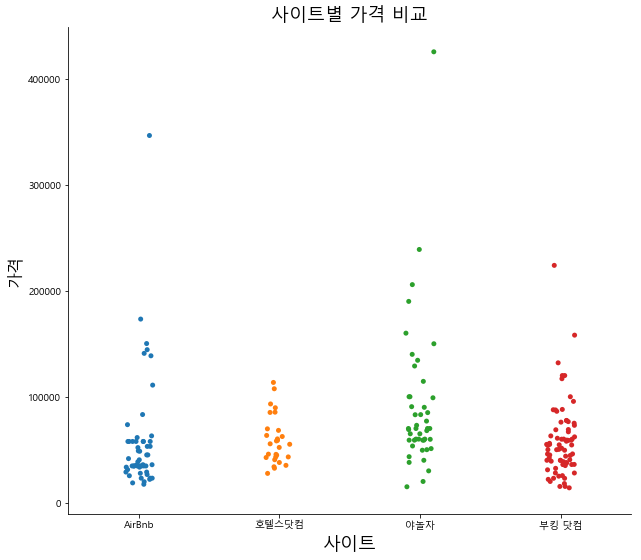

In [126]:
plt.rc('font', size = 10)
g = sns.catplot(x="사이트", y="가격", data=df_item)
plt.title("사이트별 가격 비교", size=18)
plt.xlabel('사이트', fontsize=18)
plt.ylabel('가격', fontsize=16)
g.fig.set_size_inches(10,8) 

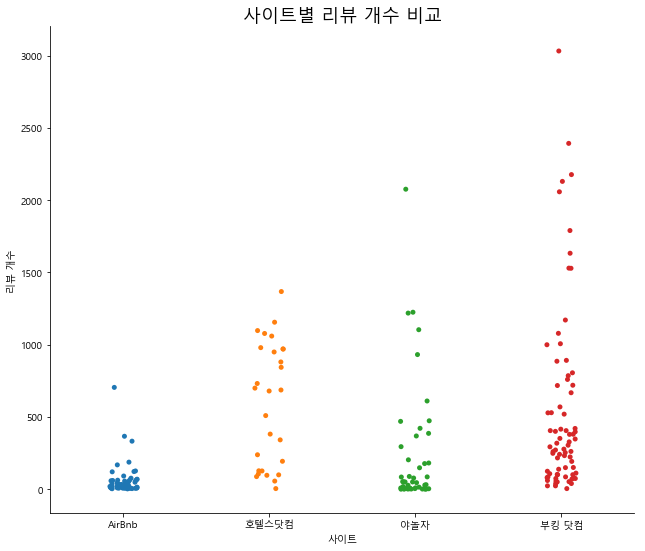

In [128]:
g = sns.catplot(x="사이트", y="리뷰 개수", data=df_item)
plt.title("사이트별 리뷰 개수 비교", size=18)
g.fig.set_size_inches(10,8)

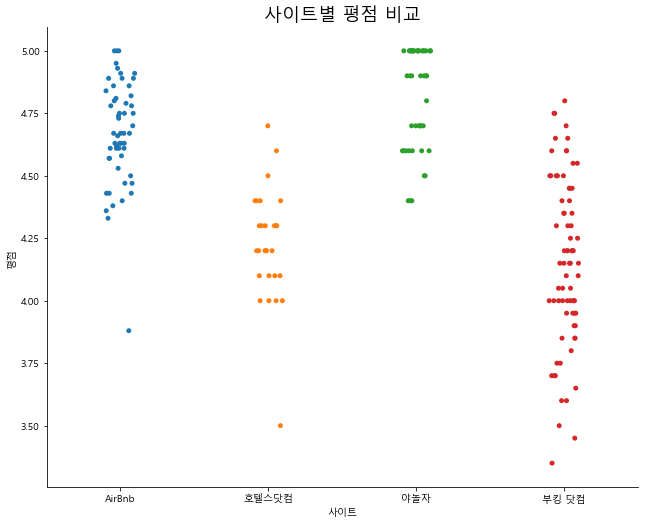

In [125]:
g= sns.catplot(x="사이트", y="평점", data=df_item)
plt.title("사이트별 평점 비교", size=18)
plt.tight_layout()
g.fig.set_size_inches(10,8)
plt.show()
#plt.ylim(0, 5) 


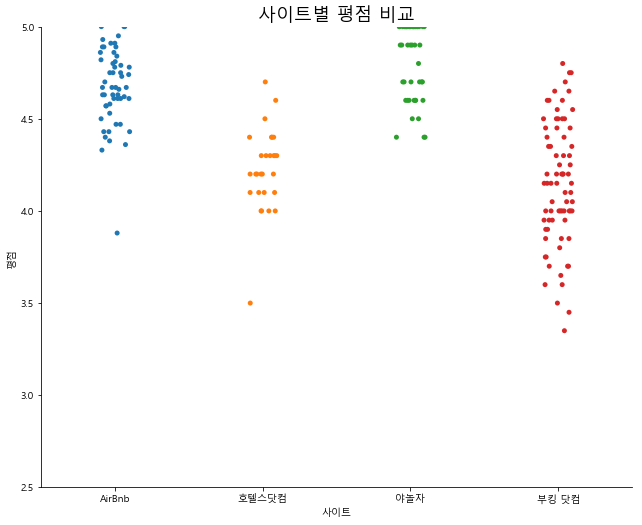

In [119]:
g= sns.catplot(x="사이트", y="평점", data=df_item)
plt.title("사이트별 평점 비교", size=18)
plt.tight_layout()
plt.ylim(2.5, 5) 
g.fig.set_size_inches(10,8)
plt.show()



Text(0.5, 1.0, '버블 크기 : 리뷰 개수')

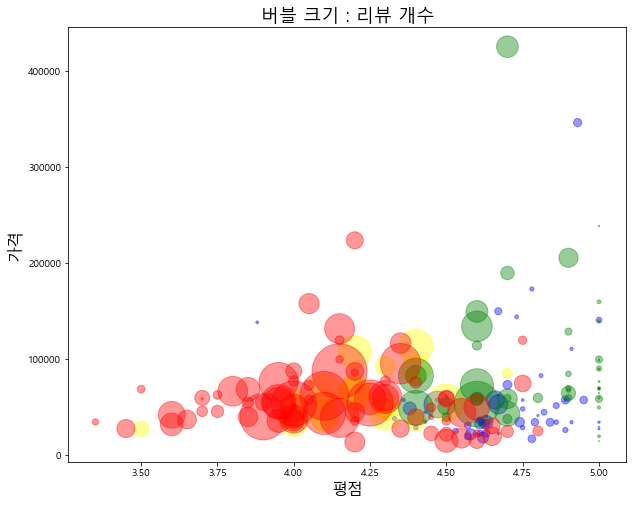

In [130]:
color = []

for i in range(len(df_item)):
    if df_item.iloc[i]['사이트'] == 'AirBnb':
        color.append('b')
    elif df_item.iloc[i]['사이트'] == '호텔스닷컴':
        color.append('yellow')
    elif df_item.iloc[i]['사이트'] == '야놀자':
        color.append('g')
    elif df_item.iloc[i]['사이트'] == '부킹 닷컴':
        color.append('r')

 
plt.figure(figsize=(10,8)) 
plt.scatter('평점', '가격',
             s='리뷰 개수',
             c=color,
             alpha=0.4, data=df_item)
plt.xlabel("평점", size=16)
plt.ylabel("가격", size=16)
plt.title("버블 크기 : 리뷰 개수", size=18)

In [79]:
import seaborn as sns

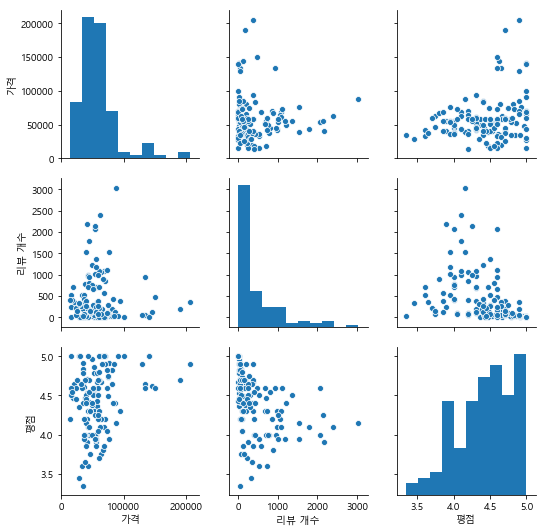

In [110]:
sns.pairplot(df_item)